<a href="https://colab.research.google.com/github/AfraAd/CSC413-Homeworks/blob/main/Fall25_HW4_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Notebook updates:
* (25/09/26) Typo in f(x):
```
(old version)
return x[0]**2 + 10*x[1]**4

(new version)
return x[0]**2 + 10*x[1]**2
```

* (25/09/27) there is no plot_convergence(your_output) function. Use plt.plot() to see the convergence.
* (25/09/27) Use 50 steps instead of 20 for part 1 SGD!

# Part 1: Adaptive gradient methods (4 points)

In the past problem sets, we explored different approaches to implementing gradient descent (hand-written backpropagation, autodiff). In this assignment, we will shift our focus to optimization methods—specifically, algorithms that use gradients to update model weights.

You will implement the following optimizers:

* Stochastic Gradient Descent (SGD)
* SGD with Momentum
* Adam
* AdamW

We are optimizing the following function:

$$f(x, y) = x^2 + 10y^2$$

A [contour plot](https://en.wikipedia.org/wiki/Contour_line) of this function is shown below.

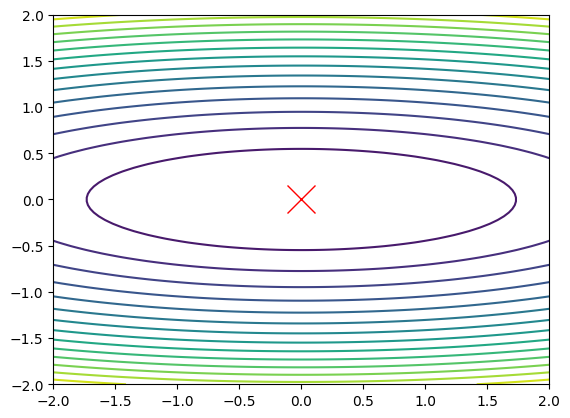

In [169]:
def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, x**2 + 10*y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20)
plot_contour()


As you can see, the minimum is at (0, 0), and the curve is much steeper in the y direction than in the x direction.

Minimize this function using gradient descent. Use the initial point $x = 2, y = 1$. Find one learning rate where optimization diverges and one "good" learning rate that reaches the minimum. For your solution, you should plot the steps taken by your optimizer on top of the contour plot. If you have an array `x` and another `y` which represent the x and y values followed over the course of minimization, you can plot them on top of the contor plot by doing:

```Python
plot_contour()
plt.plot(x, y, '-')
```

<!-- 1. Show that minimizing this function using [Newton's Method](http://d2l.ai/chapter_optimization/gd.html#newtons-method) will converge to the minimum in a single step.

1. Minimize this function using the momentum optimizer. Set the momentum hyperparameter to $0.9$. Can you find a learning rate that allows momentum to converge in less than 20 steps? Now, try optimizing for 100 steps. What is the largest and smallest learning rate you can use when optimizing for 100 steps and still converge near the minumum?

1. Implement the Adam optimizer. Use the standard values for all hyperparameters $\beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-6}, \eta = 0.001$. How many steps does it take for Adam to converge with these hyperparameters? Now, change $\eta$ to the largest value you found that worked for Momentum with 100 steps. Does Adam converge in 100 steps with this value of $\eta$? -->

In [170]:
def f(x):
    return x[0]**2 + 10*x[1]**2

def get_gradient(x): # df()
    return np.array([2, 20])*x

def minimize(initial, optimizer, N=100):
    x = np.zeros((N, len(initial)))
    x[0, :] = initial
    for n in range(1, N):
        g = get_gradient(x[n-1])
        x[n] = optimizer.step(g, x[n - 1], n)
    return x

## 1.a. SGD (1 point)

1. Complete the step function in SGD class.
2. Find one "good" learning rate that minimizes the function until the solution is within a tolerance of 1e-3 from (0,0), using 50 steps.
3. (not graded) Also, try finding one learning rate where optimization diverges (not graded)!

You can visualize the convergence by doing
```
your_output = minimize([2, 1], SGD(eta=your_eta), num_steps)
plot_contour()
plt.plot(your_output[:, 0], out[:, 1], '-')

```

In [171]:
class SGD:
    def __init__(self, eta):
        self.eta = eta

    def step(self, gradient: np.array, x: np.array, t: int):
        new_x = []
        ############ TODO: Complete the step function ############
        # Return the updated value (array) of x
        x = np.asarray(x, dtype=np.float64)
        gradient = np.asarray(gradient, dtype=np.float64)
        new_x = x - self.eta * gradient
        ##########################################################

        return new_x


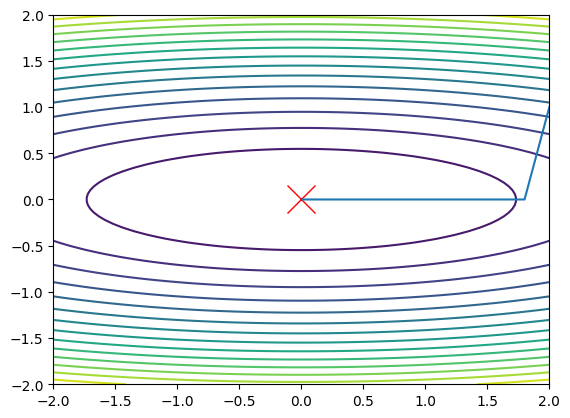

In [172]:
############ FOR YOUR INFORMATION ############
plot_contour()

out = minimize([2,1], SGD(0.05), 50)
plt.plot(out[:, 0], out[:, 1], '-')

In [173]:
##################### FOR ANSWER FOR SGD HYPERPARAMETER #####################
PART1_SGD_HYPERPARAMETER = {
    'eta': 0.05
}
#############################################################################

## 1.b SGD with momentum (1 point)

1. Complete the step function in SGDMomentum class.
2. Experiment with learning rate and beta parameters that minimizes the function until the solution is within a tolerance of 1e-3 from (0,0), using under 100 steps.
3. (not graded) What is the largest and the smallest learning rate you can find when optimizing for 100 steps and still converge near the minumum?

In [174]:
class SGDMomentum:
    def __init__(self, eta, beta):
        self.eta = eta
        self.beta = beta
        self.state = {}

    def step(self, gradient:np.array, x:np.array, t:int):
        new_x = []
        ############ TODO: Complete the step function ############
        x = np.asarray(x, dtype=np.float64)
        gradient = np.asarray(gradient, dtype=np.float64)
        v_t = self.beta * self.state.get(t, 0) + (1 - self.beta) * gradient
        self.state[t+1] = v_t
        new_x = x - self.eta * v_t
        ##########################################################
        return new_x

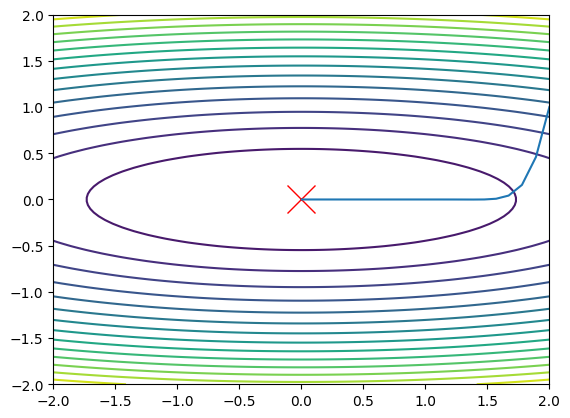

In [175]:
############ FOR YOUR INFORMATION ############
plot_contour()

out = minimize([2,1], SGDMomentum(0.03, 0.1), 100)
plt.plot(out[:, 0], out[:, 1], '-')

In [176]:
##################### YOUR ANSWER FOR SGDMOMENTUM HYPERPARAMETER #############
PART1_SGDMOMENTUM_HYPERPARAMETER = {
    'eta': 0.03,
    'beta': 0.1,
}
#############################################################################

## 1.c Adam (1 point)

1. Implement the step function in Adam class.
2. Try changing the learning rate to the largest value you found that worked for Momentum with 100 steps. Does Adam find the solution in 100 steps with this value? Experiment with learning rate, beta parameters, and epsilon to minimizes the function until the solution is within a tolerance of 1e-3 from (0,0), using 100 steps.

In [177]:
class Adam:
    def __init__(self, eta, beta1, beta2, epsilon):
        self.eta = eta
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.state = {}

    def step(self, gradient:np.array, x:np.array, t:np.array):
        new_x = []
        ################### TODO: Complete the function below  ###################
        x = np.asarray(x, dtype=np.float64)
        gradient = np.asarray(gradient, dtype=np.float64)
        v_t = self.beta1 * self.state.get('v_' + str(t), 0) + (1 - self.beta1) * gradient
        self.state['v_' + str(t+1)] = v_t
        v_t_hat = v_t / (1 - self.beta1**t)
        s_t = self.beta2 * self.state.get('s_' + str(t), 0) + (1 - self.beta2) * gradient**2
        s_t_hat = s_t / (1 - self.beta2**t)
        self.state['s_' + str(t+1)] = s_t
        g = self.eta * v_t_hat / (np.sqrt(s_t_hat) + self.epsilon)
        new_x = x - g
        ##########################################################################
        return new_x

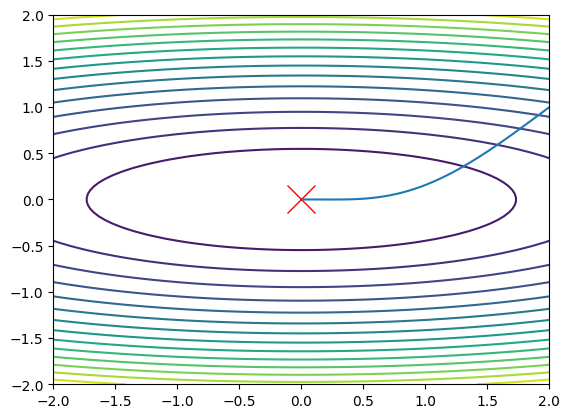

In [178]:
############ FOR YOUR INFORMATION ############
plot_contour()

out = minimize([2,1], Adam(0.05, 0.7, 0.999, 1e-8), 100)
plt.plot(out[:, 0], out[:, 1], '-')

In [179]:
##################### FOR Grading #####################
PART1_ADAM_HYPERPARAMETER = {
    'eta': 0.05,
    'beta1': 0.7,
    'beta2': 0.999,
    'epsilon': 1e-8
}
#######################################################

## 1.d AdamW (1 points)

While the implementation is similar to Adam, it differs in one key aspect: AdamW applies weight decay in the final parameter update (one line of change!):

$$
\theta_{t+1} = \theta_t - \eta \cdot \left( \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} + \lambda \theta_t \right)
$$

Where
$$
\theta_t \text{ : current parameters at step } t \\
\eta \text{ : learning rate} \\
\hat{m}_t \text{ : bias-corrected first moment estimate (mean of gradients)} \\
\hat{v}_t \text{ : bias-corrected second moment estimate (uncentered variance of gradients)} \\
\epsilon \text{ : small constant for numerical stability} \\
\lambda \text{ : weight decay coefficient (used only in AdamW)}
$$

Experiment with learning rate, beta parameters, and epsilon to minimizes the function until the solution is within a tolerance of 1e-3 from (0,0), using 100 steps.

1. Complete the step function in AdamW class.
2. Experiment with learning rate, beta parameters, and epsilon to reach the desired minimum value.

In [180]:
class AdamW:
    def __init__(self, eta, beta1, beta2, epsilon, weight_decay):
        self.eta = eta
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.weight_decay = weight_decay
        self.state = {}

    def step(self, gradient:np.array, x:np.array, t:np.array):
        new_x = []
        ################### TODO: Complete the function below  ###################
        x = np.asarray(x, dtype=np.float64)
        gradient = np.asarray(gradient, dtype=np.float64)
        v_t = self.beta1 * self.state.get('v_' + str(t), 0) + (1 - self.beta1) * gradient
        self.state['v_' + str(t+1)] = v_t
        v_t_hat = v_t / (1 - self.beta1**t)
        s_t = self.beta2 * self.state.get('s_' + str(t), 0) + (1 - self.beta2) * gradient**2
        s_t_hat = s_t / (1 - self.beta2**t)
        self.state['s_' + str(t+1)] = s_t
        g = self.eta * (v_t_hat / (np.sqrt(s_t_hat) + self.epsilon) + self.weight_decay * x)
        new_x = x - g
        ############################################################################
        return new_x

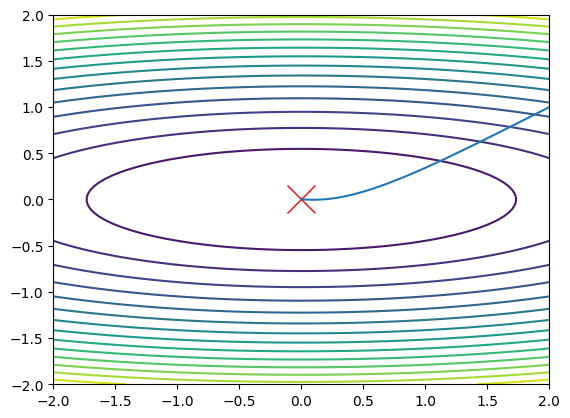

In [181]:
############ FOR YOUR INFORMATION ############
plot_contour()

out = minimize([2,1], AdamW(0.03, 0.8, 0.999, 1e-8, 0.9), 100)
plt.plot(out[:, 0], out[:, 1], '-')

In [182]:
##################### FOR Grading #####################
PART1_ADAMW_HYPERPARAMETER = {
    'eta': 0.03,
    'beta1': 0.8,
    'beta2': 0.999,
    'epsilon': 1e-8,
    'weight_decay': 0.9
}
#######################################################

# Part 2: Optimization on MLP (Point 1.5)

In this section, we will reimplement the MLP model from week 2 and train it using the optimizers you have just built. You will observe how different optimizers behave under various weight initializations. We provide the default functions from week 2, as well as the helper functions **step_relu_network_with_optimizer** and **train_relu_mlp_with_optimizer**.

You should redefine the following functions from week 2:
* relu
* relu_derivatives
* Layer
* ReLUMLP
* compute_relu_mlp_forward_passes
* compute_relu_mlp_parameter_updates
* compute_relu_mlp_partial_derivatives

TODOs:
* Redefine the **update_parameters** function in this notebook to use the optimizer you implemented.
* Then, experiment with different hyperparameter settings for each optimizer to achieve a final loss < 1 within 100 training steps.


In [183]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from fall25_hw2_mlp_solutions import (generate_flower_data,
                                      visualize_classification_data,
                                      softmax,
                                      cross_entropy_loss
                                     )
SEED = 42
np.random.seed(SEED)

In [184]:
######################## YOUR (COMPLETED) CODE FROM WEEK 2########################
def relu(x: np.array) -> np.array:
    ##########################################
    ## TODO: Compute ReLU activation,
    res = np.maximum(0, x)
    ##########################################
    assert res.shape == x.shape
    return res

def relu_derivative(x: np.array) -> np.array:
    ##########################################
    ## TODO: Compute the gradient of ReLU with respect to its inputs
    # res = ...
    res = np.where(x > 0, 1, 0)
    ##########################################
    assert res.shape == x.shape
    return res


class Layer:
    def __init__(self, input_dim, output_dim):
        # Don't change this!
        self.weights = np.random.randn(
            output_dim, input_dim
        ) * np.sqrt(2.0 / input_dim)
        self.biases = np.zeros((output_dim, 1))

    def __call__(self, X):
        ##########################################
        ## TODO: Compute the forward pass of the MLP
        ## Your Code
        # Compute (Wx + b)
        return np.dot(self.weights, X) + self.biases
        ###########################################

class ReLUMLP:
    def __init__(self, layer_widths):
        self.layers = []
        ##########################################
        ## TODO: Create the layers of MLP
        self.layers = [Layer(input_dim, output_dim) for input_dim, output_dim in zip(layer_widths[:-1], layer_widths[1:])]
        ##########################################

    def __call__(self, X):
        res = X
        ##########################################
        ## TODO: Implement forward pass of the ReLU MLP
        ## Hint: Don't forget to apply ReLU after each layer except the last
        ##########################################
        return res

def compute_relu_mlp_forward_passes(
    network: ReLUMLP, inputs: np.array
) -> Tuple[List[np.array], List[np.array]]:
    layer_outputs = [inputs]
    pre_activations = [inputs]
    ##########################################
    ## TODO: Forward pass - compute each layer's pre-activations (h_l) and activations (z_l, after ReLU)
    # and store them for later use
    for layer in network.layers[:-1]:
        h = layer(layer_outputs[-1])
        pre_activations.append(h)
        layer_outputs.append(relu(h))

    h = network.layers[-1](layer_outputs[-1])
    pre_activations.append(h)
    layer_outputs.append(h)
    ##########################################
    assert len(layer_outputs) == len(network.layers) + 1, (
        "Layer outputs should match number of layers"
    )
    assert len(pre_activations) == len(network.layers) + 1, (
        "Pre-activations should match number of layers"
    )
    return layer_outputs, pre_activations

def compute_relu_mlp_partial_derivatives(
    network: ReLUMLP, cost_partials: List[np.array], pre_activations
):
    for ind, (layer, pre_activation) in enumerate(
        zip(reversed(network.layers), reversed(pre_activations))
    ):
        ##########################################
        ## TODO: Compute the error signal propagated to each layer
        ## Hint: Cost partials: d z_l / d z_{l-1} = d z_l / d h_l * d h_l / d z_{l-1}
        if ind == 0:
            delta = layer.weights.T @ cost_partials[-1]
        else:
            delta = layer.weights.T @ (cost_partials[-1] * relu_derivative(pre_activation))
        cost_partials.append(delta)
    ##########################################
    cost_partials.reverse()
    assert len(cost_partials) == len(network.layers) + 1, (
        "Cost partials should have one more element than layers"
    )

def compute_relu_mlp_parameter_updates(
    cost_partials: List[np.array],
    pre_activations: List[np.array],
    layer_outputs: List[np.array],
    inputs: np.array,
) -> Tuple[List[np.array], List[np.array]]:
    weight_gradients = []
    bias_gradients = []
    ##########################################
    ## TODO: Compute weight gradient
    for cost_partial, layer_output, pre_activation in zip(
        cost_partials[1:], layer_outputs[:-1], pre_activations[:-1]
    ):
        weight_gradients.append(cost_partial @ layer_output.T)
        bias_gradients.append(cost_partial)
    ##########################################
    assert len(weight_gradients) == len(layer_outputs) - 1, (
        "Weight gradients should match number of layers"
    )
    assert len(bias_gradients) == len(layer_outputs) - 1, (
        "Bias gradients should match number of layers"
    )
    return weight_gradients, bias_gradients


##################################################################################

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Flower Dataset'}>)

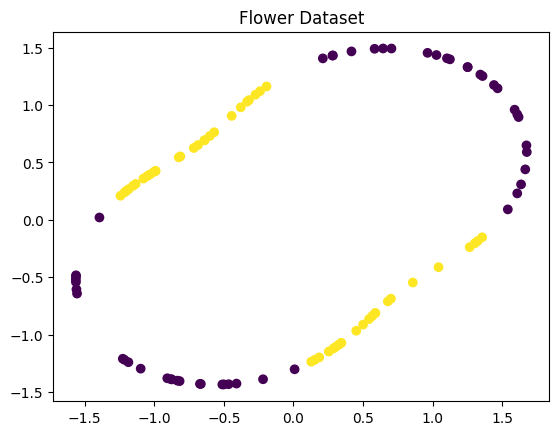

In [185]:
################ DO NOT MODIFY ################
NUM_CLASSES = 2
N_FEATURES = 2
NUM_SAMPLES = 100
np.random.seed(SEED)

flower_X, flower_y = generate_flower_data(
    num_classes=NUM_CLASSES, n_samples=NUM_SAMPLES, noise=0
)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
flower_X = scaler.fit_transform(flower_X)

visualize_classification_data(flower_X, flower_y)

In [186]:
############ DO NOT MODIFY ############
np.random.seed(SEED)
inputs = flower_X.T
targets = flower_y
targets = OneHotEncoder().fit_transform(targets).toarray().T

In [187]:
def update_parameters(
    network: ReLUMLP,
    weight_gradients: List[np.array],
    bias_gradients: List[np.array],
    optimizer,
    timestep
) -> None:

    ## TODO: Perform gradient descent by applying updates to the parameters
    ##########################################
    # Hint: call the optimizer step function, and then update the parameters.
    # 1. Store shapes and sizes of all params
    shapes_w = [layer.weights.shape for layer in network.layers]
    shapes_b = [layer.biases.shape for layer in network.layers]

    sizes_w = [np.prod(s) for s in shapes_w]
    sizes_b = [np.prod(s) for s in shapes_b]

    # 2. Flatten into one array
    flat_weights = np.concatenate([layer.weights.flatten() for layer in network.layers])
    flat_biases = np.concatenate([layer.biases.flatten() for layer in network.layers])
    flat = np.concatenate([flat_weights, flat_biases])

    # 3. Optimizer step (update in flat form)
    flat = optimizer.step(flat, flat, timestep)

    # 4. Split back into weights and biases
    # First part = all weights, second part = all biases
    idx = 0
    new_weights = []
    for size, shape in zip(sizes_w, shapes_w):
        new_weights.append(flat[idx:idx+size].reshape(shape))
        idx += size

    new_biases = []
    for size, shape in zip(sizes_b, shapes_b):
        new_biases.append(flat[idx:idx+size].reshape(shape))
        idx += size

    # 5. Assign back to network
    for layer, w, b in zip(network.layers, new_weights, new_biases):
        layer.weights = w
        layer.biases = b
    ##########################################

In [188]:
def get_optimizer(optimizer_class, **kwargs):
    return optimizer_class(**kwargs)

def step_relu_network_with_optimizer(network, inputs, targets, optimizer, timestep) -> float:
    layer_outputs, pre_activations = compute_relu_mlp_forward_passes(network, inputs)
    probs = softmax(layer_outputs[-1])
    ### Compute loss
    # Number of examples in the dataset
    n = targets.shape[1]
    ##  Cross-entropy: -1/N * sum y log p (See homework 1)
    loss = cross_entropy_loss(probs, targets)

    # backpropagation
    weight_gradients = []
    bias_gradients = []
    cost_partials = [1.0 / n * (probs - targets)]
    compute_relu_mlp_partial_derivatives(network, cost_partials, pre_activations)

    weight_gradients, bias_gradients = compute_relu_mlp_parameter_updates(
        cost_partials, pre_activations, layer_outputs, inputs
    )

    update_parameters(network, weight_gradients, bias_gradients, optimizer, timestep)
    return loss

def train_relu_mlp_with_optimizer(mlp, n_iterations: int, inputs, targets, optimizer):
    losses = []
    for i in range(n_iterations):
        loss = step_relu_network_with_optimizer(mlp, inputs, targets, optimizer, i+1)
        losses.append(loss)
    return losses

SGD final loss: 0.6931 Variance of loss: 0.00433565696541427
SGDMomentum final loss: 0.6931 Variance of loss: 0.004793310897069789
Adam final loss: 0.6591 Variance of loss: 0.005130100777916891
AdamW final loss: 0.6717 Variance of loss: 0.021632412178771147


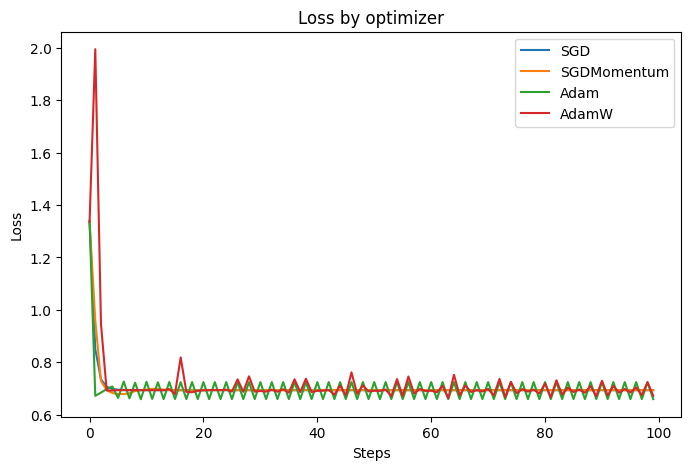

In [189]:
NUM_STEPS=100
NUM_CLASSES=2
################## YOUR HYPERPARAMETER SETTING HERE ########################
BEST_OPTIMIZER_SETTING_CASE1 = {
    'SGD': SGD(eta=np.random.rand(1)[0]),
    'SGDMomentum': SGDMomentum(eta=np.random.rand(1)[0], beta=np.random.rand(1)[0]),
    'Adam': Adam(eta=np.random.rand(1)[0], beta1=np.random.rand(1)[0], beta2=np.random.rand(1)[0], epsilon=np.random.rand(1)[0]),
    'AdamW': AdamW(eta=np.random.rand(1)[0], beta1=np.random.rand(1)[0], beta2=np.random.rand(1)[0], epsilon=np.random.rand(1)[0], weight_decay=np.random.rand(1)[0])
}
############################################################################

f, ax = plt.subplots(figsize=(8,5))
for opt in BEST_OPTIMIZER_SETTING_CASE1:
    np.random.seed(SEED)
    relu_mlp = ReLUMLP([2, 16, NUM_CLASSES])
    myoptimizer = BEST_OPTIMIZER_SETTING_CASE1[opt]
    losses = train_relu_mlp_with_optimizer(mlp=relu_mlp, n_iterations=NUM_STEPS, inputs=inputs, targets=targets, optimizer=myoptimizer)
    print(f"{myoptimizer.__class__.__name__} final loss: {losses[-1]:.4f} Variance of loss: {np.var(losses)}")
    ax.plot(losses, label=myoptimizer.__class__.__name__)
    ax.set_xlabel("Steps")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.set_title("Loss by optimizer")

# Part 3: Impact of network initialization on convergence behavior (1 point)


In this section, experiment with different hyperparameter settings to observe how sensitive the model can be under poor network initialization. Then, implement Glorot initialization to see how a more stable weight initialization improves convergence and helps the model train more reliably.

Essentially, Glorot initialization chooses the range of the weights so that the variance of activations and gradients is roughly the same across layers. This helps prevent common ussies of vanishing gradients or exploding gradients.

**TODOs:**

* Implement Glorot initialization:
$$
W_{ij} \sim \text{Uniform}\Big[-\text{limit}, \text{limit}\Big], \quad \text{limit} = \sqrt{\frac{6}{\text{fan\_in} + \text{fan\_out}}}
$$

* Initialize the bias to be 0.


In [190]:
def init_mlp(seed, init_method, num_classes=NUM_CLASSES):
    """Builds an MLP with all weights = 1 (bad initialization)."""
    np.random.seed(seed)
    relu_mlp = ReLUMLP([2, 16, 16, num_classes])
    relu_mlp = init_method(relu_mlp)
    return relu_mlp

def init_ones(mlp):
    for l in mlp.layers:
        l.weights = np.ones_like(l.weights)
    return mlp

def init_large(mlp):
    for l in mlp.layers:
        l.weights *= 100
    return mlp

def init_glorot(mlp, SEED=42):
    np.random.seed(SEED) ## DO NOT MODIFY THE SEED
    for l in mlp.layers:
    ################## YOUR CODE ##################
        fan_in = l.weights.shape[0]
        fan_out = l.weights.shape[1]
        limit = np.sqrt(6 / (fan_in + fan_out))
    ###############################################
    return mlp

In [191]:
NUM_STEPS=100
############################## YOUR HYPERPAREMTER HERE (not graded) ##############################
BEST_OPTIMIZER_SETTING_CASE2={
    'SGD': SGD(eta=np.random.rand(1)[0]),
    'SGDMomentum': SGDMomentum(eta=np.random.rand(1)[0], beta=np.random.rand(1)[0]),
    'Adam': Adam(eta=np.random.rand(1)[0], beta1=np.random.rand(1)[0], beta2=np.random.rand(1)[0], epsilon=np.random.rand(1)[0]),
    'AdamW': AdamW(eta=np.random.rand(1)[0], beta1=np.random.rand(1)[0], beta2=np.random.rand(1)[0], epsilon=np.random.rand(1)[0], weight_decay=np.random.rand(1)[0])
}
######################################################################################

SGD final loss: 0.6931 Variance of loss: 0.0
SGDMomentum final loss: 0.6931 Variance of loss: 0.0
Adam final loss: 0.6931 Variance of loss: 0.0
AdamW final loss: 0.6931 Variance of loss: 0.0


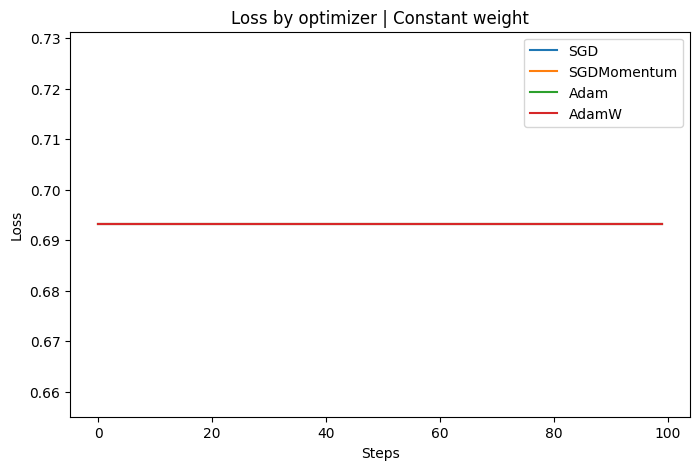

In [192]:
### CONSTANT INIT
plt.figure(figsize=(8,5))
for opt in BEST_OPTIMIZER_SETTING_CASE2:
    myoptimizer = BEST_OPTIMIZER_SETTING_CASE2[opt]
    model = init_mlp(SEED, init_ones)
    losses = train_relu_mlp_with_optimizer(model, NUM_STEPS, inputs, targets, myoptimizer)
    print(f"{myoptimizer.__class__.__name__} final loss: {losses[-1]:.4f} Variance of loss: {np.var(losses)}")
    plt.plot(losses, label=myoptimizer.__class__.__name__)

plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss by optimizer | Constant weight")
plt.show()

SGD final loss: 0.6931 Variance of loss: 1.1012360691781367
SGDMomentum final loss: 0.6931 Variance of loss: 12.30541803112195
Adam final loss: 4.6228 Variance of loss: 9.275965872266598
AdamW final loss: 0.6931 Variance of loss: 7.715311154900141


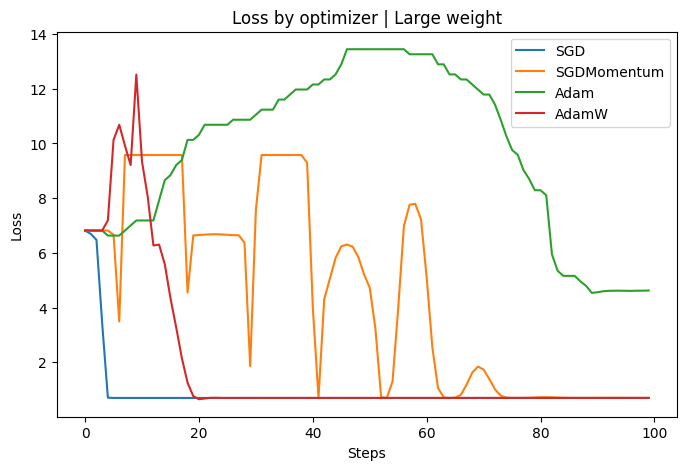

In [193]:
### LARGE INIT
plt.figure(figsize=(8,5))
for opt in BEST_OPTIMIZER_SETTING_CASE2:
    myoptimizer = BEST_OPTIMIZER_SETTING_CASE2[opt]
    model = init_mlp(SEED, init_large)
    losses = train_relu_mlp_with_optimizer(model, NUM_STEPS, inputs, targets, myoptimizer)
    print(f"{myoptimizer.__class__.__name__} final loss: {losses[-1]:.4f} Variance of loss: {np.var(losses)}")
    plt.plot(losses, label=myoptimizer.__class__.__name__)

plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss by optimizer | Large weight")
plt.show()

SGD final loss: 0.6931 Variance of loss: 0.0002679705372903943
SGDMomentum final loss: 0.6931 Variance of loss: 0.0004268148255857722
Adam final loss: 0.6931 Variance of loss: 0.00027849052786627884
AdamW final loss: 0.6931 Variance of loss: 0.0002679576827576067


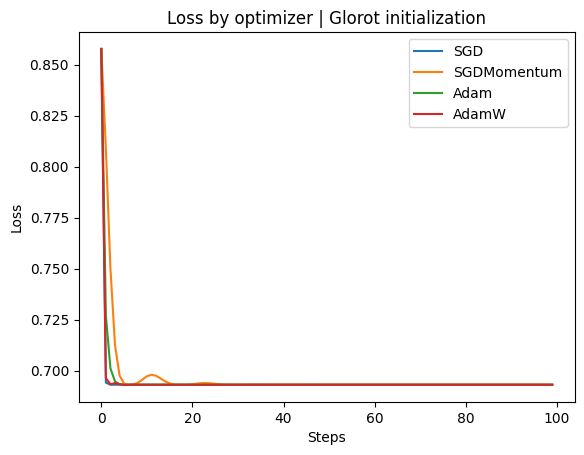

In [194]:
### Glorot INIT
for opt in BEST_OPTIMIZER_SETTING_CASE2:
    myoptimizer = BEST_OPTIMIZER_SETTING_CASE2[opt]
    model = init_mlp(SEED, init_glorot)
    losses = train_relu_mlp_with_optimizer(model, NUM_STEPS, inputs, targets, myoptimizer)
    print(f"{myoptimizer.__class__.__name__} final loss: {losses[-1]:.4f} Variance of loss: {np.var(losses)}")
    plt.plot(losses, label=myoptimizer.__class__.__name__)

plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss by optimizer | Glorot initialization")
plt.show()